In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p

In [ ]:
def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p

def check_stab(df):
    new_col = []
    for i in range(len(df)):
        if df['Pokemon Type'][i].split('\'')[1] == df['Type Move'][i] or (len(df['Pokemon Type'][i].split('\'')) > 3 and df['Pokemon Type'][i].split('\'')[3] == df['Type Move'][i]):
            new_col.append(True)
        else:
            new_col.append(False)
    df = df.assign(stab=new_col)
    df = df.drop(['Pokemon Type', 'Type Move'], axis= 1)
    return df

In [53]:
df = pd.read_csv("../parsing Dataset/log/Dataset.csv")

df["UserHP"] = df["UserHP"].map(percentual_Transform)
df["SuffererHP"] = df["SuffererHP"].map(percentual_Transform)

df.rename({"UserHP": "Pokemon HP","SuffererHP": "Enemy HP","TypeM": "Type Move",
           "categoryMove": "Category Move","TypesS" : "Enemy Type","TypesU":"Pokemon Type",
           "power":"Power"}, axis=1, inplace=True)
df["Choose"] = np.ones(len(df)).astype(int)
df = check_stab(df)
df

,User,Sufferer,name move,Pokemon Type,Enemy Type,Type Move,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose
0,Flygon,Aerodactyl\n,U-turn,"['ground', 'dragon']","['rock', 'flying']",bug,70,100.000000,100.000000,none,physical,1
1,Aerodactyl,Bronzong\n,Stealth Rock,"['rock', 'flying']","['steel', 'psychic']",rock,0,100.000000,100.000000,none,status,1
2,Bronzong,Bronzong\r\n,Trick Room,"['steel', 'psychic']","['steel', 'psychic']",psychic,0,100.000000,100.000000,none,status,1
3,Bronzong,Forretress\r\n,Earthquake,"['steel', 'psychic']","['bug', 'steel']",ground,100,100.000000,100.000000,none,physical,1
4,Forretress,Bronzong\r\n,Spikes,"['bug', 'steel']","['steel', 'psychic']",ground,0,100.000000,100.000000,none,status,1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Entei,Fezandipiti\r\n,Sacred Fire,['fire'],"['poison', 'fairy']",fire,100,72.638436,38.545455,none,physical,1
603,Persian,Persian\r\n,Nasty Plot,['normal'],['normal'],dark,0,100.000000,100.000000,none,status,1
604,Entei,Persian\r\n,Sacred Fire,['fire'],['normal'],fire,100,72.638436,100.000000,none,physical,1
605,Persian,Entei\r\n,Dark Pulse,['normal'],['fire'],dark,80,100.000000,72.638436,none,special,1


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
enc.fit(df[["Pokemon HP"]])
df["Pokemon HP"] = enc.transform(df[["Pokemon HP"]]).astype(int)
enc.fit(df[["Enemy HP"]])
df["Enemy HP"] = enc.transform(df[["Enemy HP"]]).astype(int)
enc = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
enc.fit(df[["Power"]])
df["Power"] = enc.transform(df[["Power"]]).astype(int)
df

,User,Sufferer,name move,Pokemon Type,Enemy Type,Type Move,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose
0,Flygon,Aerodactyl\r\n,U-turn,"['ground', 'dragon']","['rock', 'flying']",bug,0,2,2,none,physical,1
1,Aerodactyl,Bronzong\r\n,Stealth Rock,"['rock', 'flying']","['steel', 'psychic']",rock,0,2,2,none,status,1
2,Bronzong,Bronzong\r\n,Trick Room,"['steel', 'psychic']","['steel', 'psychic']",psychic,0,2,2,none,status,1
3,Bronzong,Forretress\r\n,Earthquake,"['steel', 'psychic']","['bug', 'steel']",ground,1,2,2,none,physical,1
4,Forretress,Bronzong\r\n,Spikes,"['bug', 'steel']","['steel', 'psychic']",ground,0,2,2,none,status,1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Entei,Fezandipiti\r\n,Sacred Fire,['fire'],"['poison', 'fairy']",fire,1,2,1,none,physical,1
603,Persian,Persian\r\n,Nasty Plot,['normal'],['normal'],dark,0,2,2,none,status,1
604,Entei,Persian\r\n,Sacred Fire,['fire'],['normal'],fire,1,2,2,none,physical,1
605,Persian,Entei\r\n,Dark Pulse,['normal'],['fire'],dark,0,2,2,none,special,1


In [40]:
import json

with open("../../../../data/Weakness.json", 'r+') as weakfile:
    weak = json.load(weakfile)
    weakfile.close()
    
def Generate_Multiplicator(x):
    EnemyType = x["Enemy Type"]
    MoveType = x["Type Move"]
    weakness = 1
    print(EnemyType)
    for Type in EnemyType:
        print(Type)
        if not Type.isalnum():
            continue
        weakness = weakness * weak[MoveType][Type] 
    return weakness
    

In [41]:

df["Multiplicator"] = df[["Enemy Type","Type Move"]].apply(Generate_Multiplicator, axis=1)
df

['rock', 'flying']
[
'
r


KeyError: 'r'

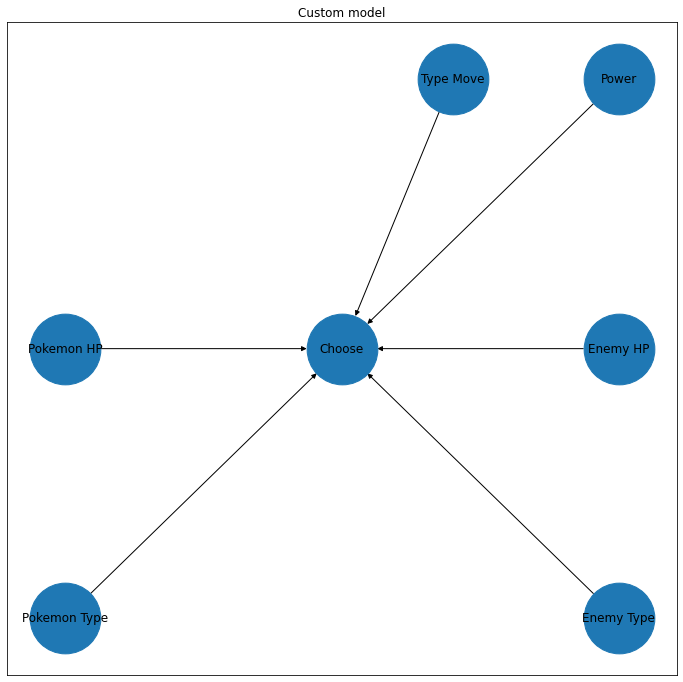

In [5]:
custom_model = BayesianNetwork([('Pokemon HP', 'Choose'), ('Enemy HP', 'Choose'),
                              ('Pokemon Type', 'Choose'), ('Enemy Type', 'Choose'), ('Power', 'Choose'),
                               ("Type Move","Choose")])
pos = {'Pokemon HP': [0.75, -0.5], 'Enemy HP': [1.25, -0.5],
       'Pokemon Type': [0.75, -1.], 'Enemy Type': [1.25, -1],
       'Power': [1.25, 0], "Type Move" : [1.1, 0],
       'Choose': [1, -0.5]}
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(custom_model, pos=pos, ax=ax, node_size=5000)
ax.set_title('Custom model')
fig.savefig('custom_bn')

In [10]:

estimator = BayesianEstimator(model=custom_model, data=df)

cpds = []
for node in custom_model.nodes():
    if node == "Choose":
        continue
    cpds.append(estimator.estimate_cpd(node=node, 
                                       prior_type="BDeu", 
                                       equivalent_sample_size=10))
custom_model.add_cpds(*cpds)

print('Checking the model...')
print(f'The model is {custom_model.check_model()}\n\n')

for cpd in [cpd for cpd in custom_model.get_cpds()]:
    print(f'CPD for {cpd.variable}:')
    print(cpd, '\n')

Pokemon HP
Choose
Choose
Enemy HP
Pokemon Type
Enemy Type
Power
Type Move
Checking the model...
CPD for Pokemon HP:
+---------------+-----------+
| Pokemon HP(0) | 0.0410589 |
+---------------+-----------+
| Pokemon HP(1) | 0.118855  |
+---------------+-----------+
| Pokemon HP(2) | 0.840086  |
+---------------+-----------+ 

CPD for Enemy HP:
+-------------+-----------+
| Enemy HP(0) | 0.0459211 |
+-------------+-----------+
| Enemy HP(1) | 0.115613  |
+-------------+-----------+
| Enemy HP(2) | 0.838466  |
+-------------+-----------+ 

CPD for Pokemon Type:
+--------------------------------------+------------+
| Pokemon Type(['bug', 'fire'])        | 0.006705   |
+--------------------------------------+------------+
| Pokemon Type(['bug', 'flying'])      | 0.00346351 |
+--------------------------------------+------------+
| Pokemon Type(['bug', 'grass'])       | 0.00346351 |
+--------------------------------------+------------+
| Pokemon Type(['bug', 'poison'])      | 0.0148087  |
+-

ValueError: No CPD associated with Choose